### STA 561 Homework 1
#### *Due January 20, 2023*
Authors
 -  Alonso Guerrero Castaneda (UID: 1194613)
 -  Eli Gnesin (UID: 1172961)
 -  Tommy Misikoff (UID: 1166813)
 -  Sanskriti Purohit (UID: 1179957)
 -  Will Tirone (UID: 1130904)

TA: Rick Presman

### Question 1

#### a)   

Consider $\beta_Q^*$, through the given argument,

$$\beta_Q^* = \text{arg min}_\beta Q(Y-\mathbf{X}^\top)^2=\text{arg min}_\beta \int(y-x^\top\beta)^2q(x,y)dxdy$$

Since $p(x,y)$ and $q(x,y)$ only differ in the marginal distributions of x, the expressions for $\beta_Q^*$ and $\beta_P^*$ also only differ with them. Therefore, for simplicity, we consider $p(y|x) \sim Unif(0,x)$, $p(x) \sim Unif(0,1)$, $q(x)\sim Unif(0,2)$ which implies that $P = \frac{1}{x}$ and $Q = \frac{1}{2x}$.

#### b)

Consider $\beta_P^*$,

$$
\begin{aligned}
\beta_P^* &= \text{arg min}_\beta \int(y-x^\top\beta)^2p(x,y)dxdy \\
&= \text{arg min}_\beta \int (y-x^\top\beta)^2 p(x)p(y|x)dxdy \\ 
&= \text{arg min}_\beta \int \frac{p(x)}{q(x)}(y-x^\top\beta)^2 q(x)p(y|x)dxdy \\
&= \text{arg min}_\beta \int \frac{p(x)}{q(x)}(y-x^\top\beta)^2 q(x,y)dxdy \\
\beta_P^* &= \text{arg min}_\beta Q \left\{\frac{p(x)}{q(x)}(Y-\mathbf{X}^\top\beta)^2\right\}
\end{aligned}\\ 
$$
If $p(x) \neq 0$ when $q(x)=0$ then the integral in the above expression will not be defined. 

#### c)

Following the class notes (p.9), the estimator for $\boldsymbol{\beta}^*_p$ is $\widehat{\boldsymbol{\beta}}_n$ as defined below. For conciseness, instead of writing $\mathbb{Q}_n\frac{ p(\mathbf{X})}{q(\mathbf{X})}$ we will just write it as $\mathbb{P}_n$. Given the proof above, they are interchangeable.

$$
\widehat{\boldsymbol{\beta}}_n=\arg \min _{\boldsymbol{\beta}} \mathbb{P}_n\left(Y-\mathbf{X}^{\top} \boldsymbol{\beta}\right)^2,
$$

We take the derivative with respect to $\beta$, set it to zero and solve it for it. 

$$
\mathbb{P}_n\left(Y-\mathbf{X}^{\top} \widehat{\boldsymbol{\beta}}_n\right) \mathbf{X}=0 \quad \Rightarrow \widehat{\boldsymbol{\beta}}_n=\left(\mathbb{P}_n \mathbf{X} \mathbf{X}^{\top}\right)^{-1} \mathbb{P}_n \mathbf{X} Y
$$

In order to prove consistency and asymptotic normality, following the class notes (p.10), we first subtract $\beta^*$ from both sides and scale by $\sqrt{n}$:
$$
\sqrt{n}\left(\widehat{\boldsymbol{\beta}}_n-\boldsymbol{\beta}^*\right)=\left(\mathbb{P}_n \mathbf{X} \mathbf{X}^{\boldsymbol{\top}}\right)^{-1} \sqrt{n} \mathbb{P}_n \mathbf{X}\left(Y-\mathbf{X}^{\boldsymbol{\top}} \boldsymbol{\beta}^*\right) \\
$$
We know that $P\left(Y-\mathbf{X}^{\top} \beta^*\right) \mathbf{X}=0$ so:
$$
\begin{aligned}
\sqrt{n}\left(\widehat{\boldsymbol{\beta}}_n-\boldsymbol{\beta}^*\right) & =\left(\mathbb{P}_n \mathbf{X} \mathbf{X}^{\top}\right)^{-1} \sqrt{n}\left(\mathbb{P}_n-P\right) \mathbf{X}\left(Y-\mathbf{X}^{\top} \boldsymbol{\beta}^*\right) \\
& =\left(P \mathbf{X} \mathbf{X}^{\top}\right)^{-1} \sqrt{n}\left(\mathbb{P}_n-P\right) \mathbf{X}\left(Y-\mathbf{X}^{\top} \boldsymbol{\beta}^*\right)+o_P(1) \\
& \rightsquigarrow \operatorname{Normal}\left\{0,\left(P \mathbf{X} \mathbf{X}^{\top}\right)^{-1} P \mathbf{X} \mathbf{X}^{\top}\left(Y-\mathbf{X} \boldsymbol{\beta}^*\right)^2\left(P \mathbf{X} \mathbf{X}^{\top}\right)^{-1}\right\} \\
& \rightsquigarrow \operatorname{Normal}\left\{0,\left(Y-\mathbf{X} \boldsymbol{\beta}^*\right)^2\left(P \mathbf{X} \mathbf{X}^{\top}\right)^{-1}\right\},
\end{aligned}\\
$$
where we have $\mathbb{P}_n \mathbf{X} \mathbf{X}^{\top} \rightarrow P \mathbf{X} \mathbf{X}^{\top}$ a.s.

#### d)
Suppose we have a sample $\{\mathbf{X}_j\}_{j=1}^M$ drawn from $p$ and we have the observed sample $\{(\tilde{\mathbf{X}_i}, \tilde{Y_i})\}_{i=1}^n$ drawn from the distribution $Q$. We can then suggest an estimator $\hat\beta_P = \text{arg min}_\beta \mathbb{P}(\tilde{Y}-\mathbf{\tilde{X}}^\top\beta)^2$ where $\mathbb{P}$ is the ratio of the empirical distributions of the $X_j$ from the unknown sample to the $\tilde{X_i}$ from the sample drawn from the distribution $Q$. This follows as well from the result in part b).

In [ ]:
#Load packages

import pandas as pd 
import plotly.express as px
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Question 2

### 1. Loading Data

We plotted the scatterplots in two steps because it was unreadable in one plot. `g8`, `g9`, and `g16` look the most correlated with `survival_normalized` though none of them look strongly correlated. At least visually, it seems weak at best. 

There are a few potential outliers in `g0`, `g1`, `g4`, `g5`, `g6`, `g9`, `g10`,and `g12` again visually by looking at the scatterplots. However, they look like minimal outliers at worst and would need further diagnostics to check whether they're actually outliers or not.

In [ ]:
# Load 
lineberger = pd.read_csv("https://raw.githubusercontent.com/ericlaber/ericlaber.github.io/main/docs/lineberger_study_data.csv")

# drop first column, just rownumbers 
lineberger.drop(labels='Unnamed: 0', axis=1, inplace=True)
lineberger.head()

,survival_normalized,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16
0,162.0,-1.899112,-6.828488,0.069213,-0.554842,-0.896690,14.172011,32.687909,-0.678617,-64.812548,-10.721686,-7.758537,37.523931,-231.263396,45.963081,-26.290816,67.943612,-47.242922
1,163.0,-1.871867,-11.288045,-0.649032,-0.232348,3.330865,53.707229,6.720781,-98.633338,-18.021141,-79.142904,15.128356,-96.162151,163.573959,-100.297776,-8.387626,-24.698256,13.903358
2,164.0,2.298674,-2.723340,-0.451990,-0.541226,-10.223753,-80.672098,-19.010697,109.962482,-123.573809,-111.735889,6.182055,43.942510,-14.658361,5.662201,-8.816030,66.776451,-97.106807
3,165.0,-0.012713,3.933514,0.410917,-0.743704,2.191171,33.020904,16.088493,-86.920861,-71.529379,15.581413,-11.456608,-26.230100,117.757913,-191.889019,6.202544,-34.336538,-55.330980
4,166.0,1.036401,-1.102663,-0.216935,-1.662699,-10.697938,-118.164102,13.069330,12.899489,-44.465947,-9.598461,31.297052,-39.375772,154.765486,-218.115365,25.912882,-72.329837,38.553505


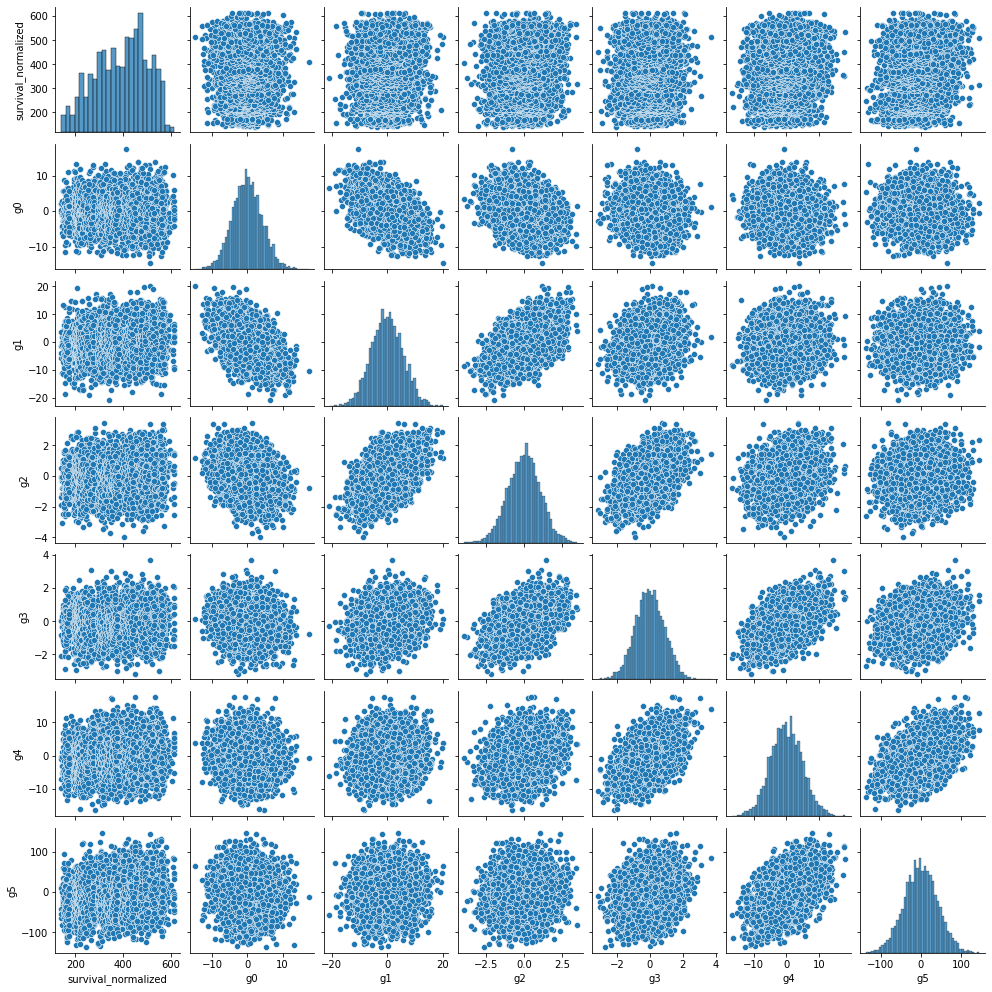

In [ ]:
fig1 = sns.pairplot(lineberger.iloc[:, 0:7], height = 2, markers = "o")
plt.show() 

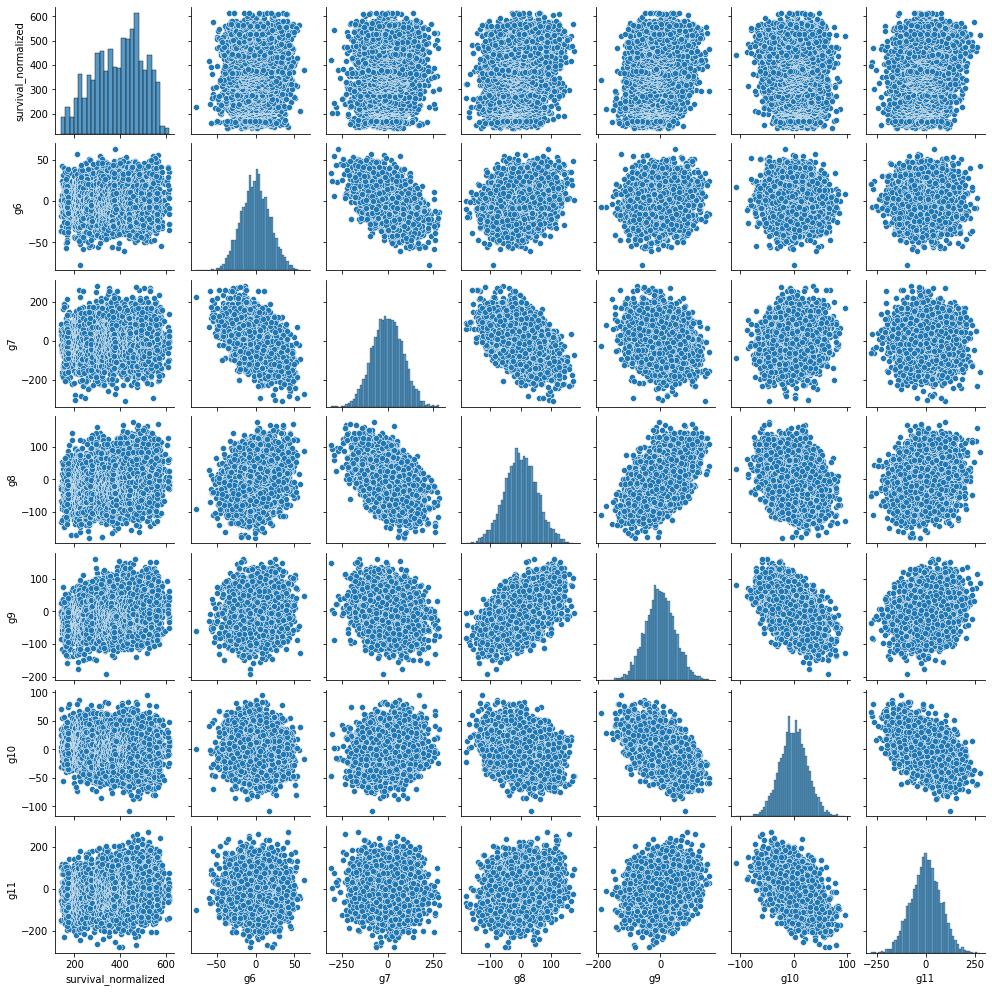

In [ ]:
fig2 = sns.pairplot(lineberger.iloc[:,[0] + list(range(7,13))], height = 2, markers = "o")
plt.show() 

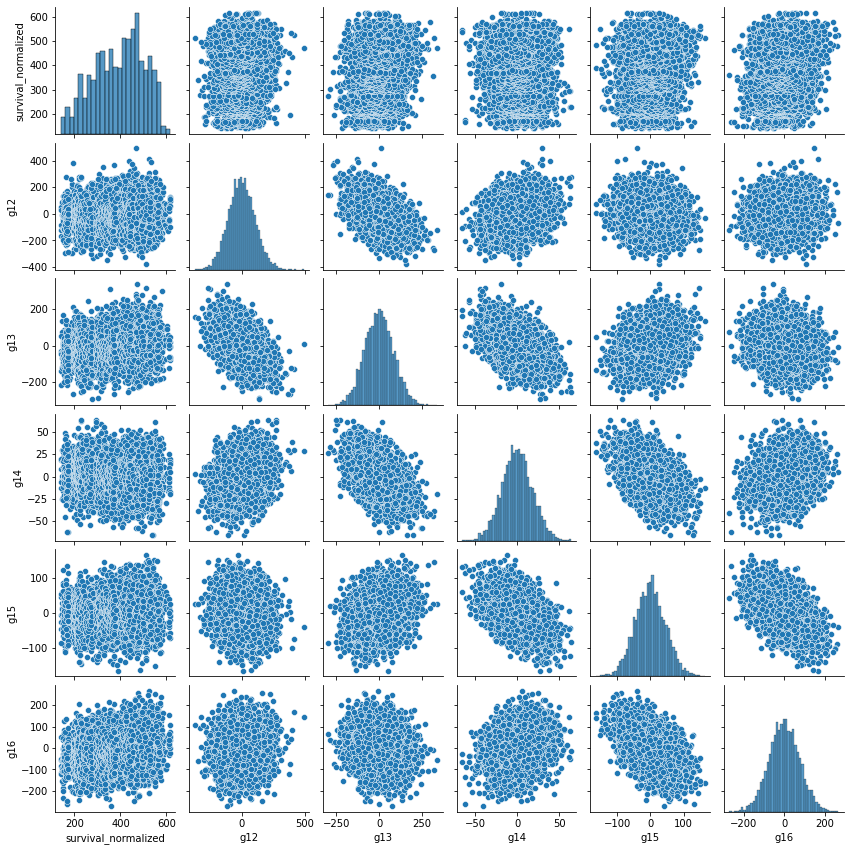

In [ ]:
fig3 = sns.pairplot(lineberger.iloc[:,[0] + list(range(13,18))], height = 2, markers = "o")
plt.show() 

## 2. Fitting the Model

A linear model is fit below and results for question can be read off of table. `coef` is a column of coefficients, `R-squared` = 0.037, and 95% intervals are in the columns labelled `[0.025 0.975]`. 

In [ ]:
y = lineberger.iloc[:,0]
X = lineberger.iloc[:,1:]

# fit the model
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     survival_normalized   R-squared (uncentered):                   0.037
Model:                             OLS   Adj. R-squared (uncentered):              0.034
Method:                  Least Squares   F-statistic:                              12.20
Date:                 Thu, 19 Jan 2023   Prob (F-statistic):                    4.85e-34
Time:                         19:50:42   Log-Likelihood:                         -39675.
No. Observations:                 5354   AIC:                                  7.938e+04
Df Residuals:                     5337   BIC:                                  7.950e+04
Df Model:                           17                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
g0             3.2400      1.508      2.149      0.032       0.284       6.196
g1             3.0000      1.240      2.420      0.016       0.569       5.431
g2             5.0000      6.639      0.753      0.451      -8.015      18.015
g3            -4.0000      7.917     -0.505      0.613     -19.521      11.521
g4             1.0000      1.450      0.690      0.490      -1.842       3.842
g5             0.5000      0.168      2.978      0.003       0.171       0.829
g6             0.5000      0.382      1.309      0.191      -0.249       1.249
g7             0.5000      0.084      5.968      0.000       0.336       0.664
g8             0.5000      0.130      3.835      0.000       0.244       0.756
g9             0.5000      0.147      3.395      0.001       0.211       0.789
g10            0.5000      0.271      1.843      0.065      -0.032       1.032
g11            0.5000      0.093      5.391      0.000       0.318       0.682
g12            0.5000      0.067      7.457      0.000       0.369       0.631
g13            0.5000      0.083      6.023      0.000       0.337       0.663
g14            0.5000      0.384      1.302      0.193      -0.253       1.253
g15            0.5000      0.153      3.276      0.001       0.201       0.799
g16            0.5000      0.082      6.061      0.000       0.338       0.662
==============================================================================
Omnibus:                     1682.520   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.394
Skew:                           0.409   Prob(JB):                     6.20e-86
Kurtosis:                       1.956   Cond. No.                         204.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. Plotting fitted values

We can now use the results object to plot the fitted values against the residuals using matplotlib. The pattern that appears is the phrase "UNC Smells!"

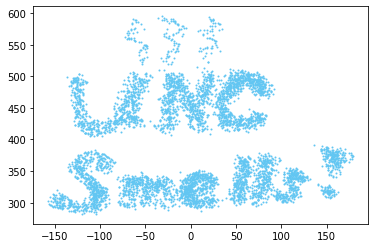

In [ ]:
# Plot the fitted values against the residuals
plt.scatter(x = results.fittedvalues, y= results.resid, 
            s = 1, color = "#62C6F2")
plt.show()

## Resources Used: 



1. https://plotly.com/python/splom/
2. https://realpython.com/linear-regression-in-python/
3. https://en.wikipedia.org/wiki/Carolina_blue

